In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exercise-1/3-customersatisfaction.csv
/kaggle/input/exercise-1/1-studyhours.csv
/kaggle/input/exercise-1/2-multiplegradesdataset.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/exercise-1/2-multiplegradesdataset.csv')

In [4]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [5]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [7]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

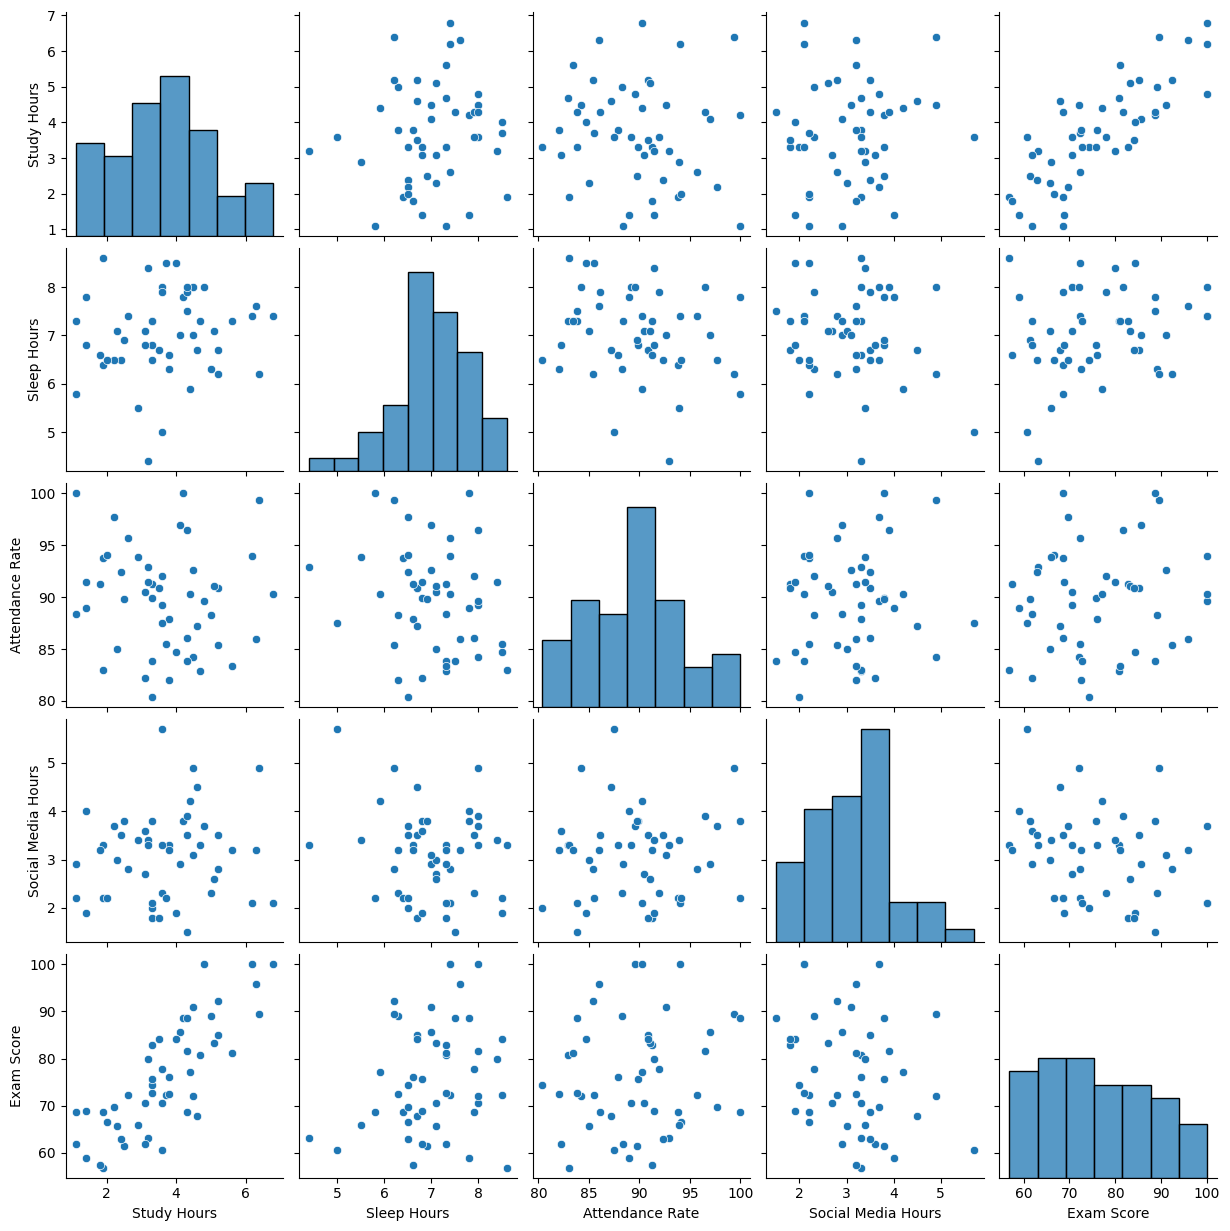

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


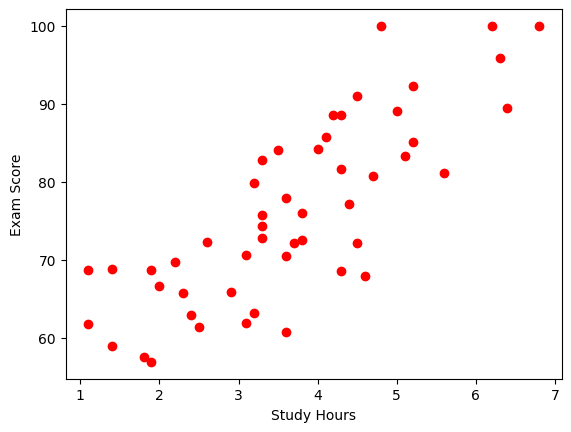

In [10]:
plt.scatter(df['Study Hours'],df['Exam Score'], color='r')
plt.xlabel('Study Hours')
plt.ylabel("Exam Score")
plt.show()

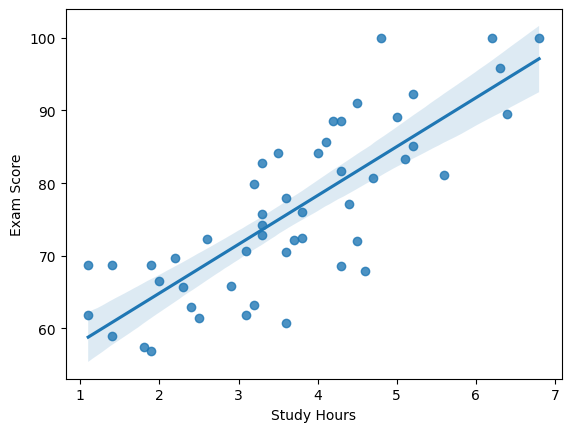

In [11]:
sns.regplot(x=df["Study Hours"],y=df['Exam Score'])
plt.show()

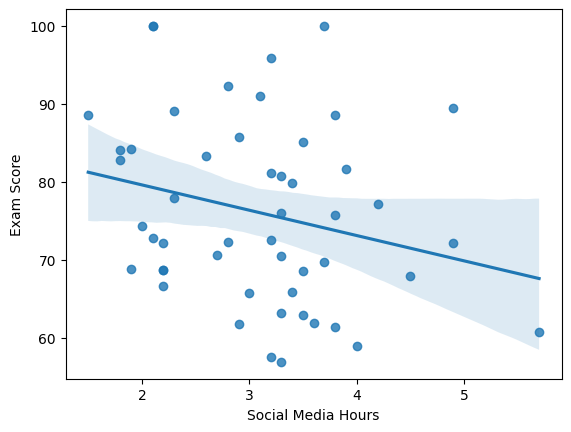

In [12]:
sns.regplot(x=df['Social Media Hours'],y=df['Exam Score'])
plt.show()

In [13]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [14]:
#Independent and dependent features
X=df.iloc[:,:-1] #means all rows, columns except last one column ->features
y = df.iloc[:,-1] #means all rows, only the last column -> target

In [15]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [16]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [17]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [18]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
#Regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [20]:
#Prediction
y_pred = regression.predict(X_test)

In [21]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f"mse: {mse}")
print(f"mae: {mae}")
print(f"rmse: {rmse}")

mse: 14.600589378986259
mae: 3.2770264859627862
rmse: 3.8210717578954543


In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(f"r2 score: {score}")

#adjusted R-squared
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

r2 score: 0.915670734577271
0.8735061018659065


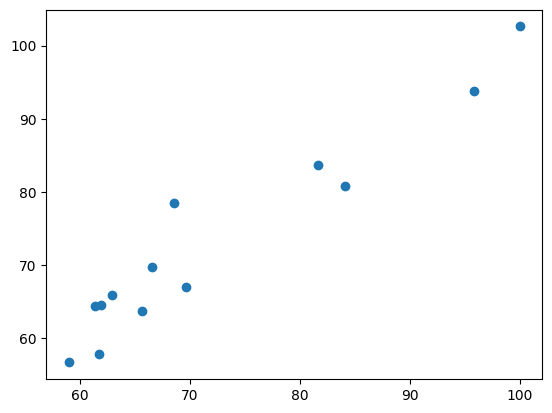

In [23]:
plt.scatter(y_test,y_pred)
plt.show()

In [24]:
residuals = y_test - y_pred
print(residuals) #residuals are errors

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


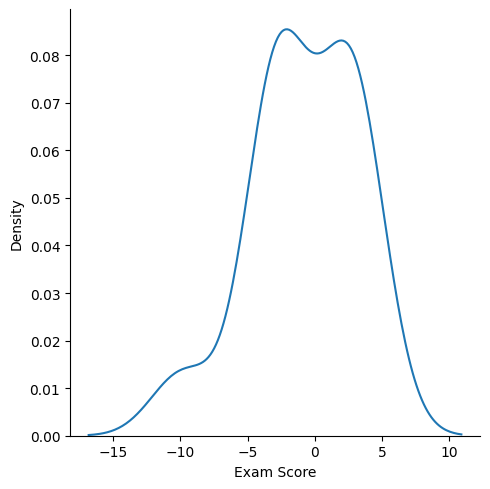

In [25]:
#if residuals are in normal distribution it seems good
sns.displot(residuals,kind='kde')
plt.show()

In [26]:
print(regression.intercept_)
print(regression.coef_)

77.41081081081082
[ 9.28014703  1.78967062  3.24340001 -4.08127695]


In [27]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [28]:
X_test[0]

array([-1.29053937, -0.49984673,  1.62356013,  0.67593203])

In [29]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [30]:
new_student=[[5,7,90,2]] # 5 study hours, 7 sleep hours, %90 attendance, 2 social media hours

In [31]:
new_student_scaled = scaler.transform(new_student)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
predicted_score = regression.predict(new_student_scaled)
print(predicted_score)

[90.88471349]


In [33]:
students = [
    [6,8,95,5],
    [3,6,85,4],
    [4,7,80,3]
]

In [34]:
predicted_scores = regression.predict(scaler.transform(students))
print(predicted_scores)

[90.37189122 62.43586785 72.73292556]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
